In [1]:
## test04_dataset05 adds one more Dense layer of 32 units
## between the Dense layer of 64 units and the output layer.
## Its activation algo is relu as well.
## Dataset used is pqd_dataset_05.

In [2]:
# Import dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, activations
from tensorflow.keras import optimizers, losses, metrics
from google.colab import drive

In [3]:
# Connect to the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import the training dataset
training_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_05/training_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 4200 files belonging to 10 classes.


In [5]:
# Import the validation dataset
validation_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_05/validation_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 1400 files belonging to 10 classes.


In [6]:
# Import the testing dataset
testing_dataset = utils.image_dataset_from_directory(
    directory='/content/drive/My Drive/pqd_dataset_05/testing_set',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 1400 files belonging to 10 classes.


In [7]:
# Build the CNN model
cnn = models.Sequential()
# Add first convolution layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(5, 5), 
    padding='valid', 
    activation='relu', 
    input_shape=(200, 200, 1)
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add second convolution layer
cnn.add(layers.Conv2D(
    filters=48, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
cnn.add(layers.AvgPool2D(
    pool_size=(2, 2)
    )
)
# Add final convolution layer
cnn.add(layers.Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
# Add flatten layer
cnn.add(layers.Flatten())
# Add Dense layer of 128 units
cnn.add(layers.Dense(
    units=128,
    activation='relu'
  )
)
# Add Dense layer of 64 units
cnn.add(layers.Dense(
    units=64,
    activation='relu'
  )
)
# Add Dense layer of 32 units
cnn.add(layers.Dense(
    units=32,
    activation='relu'
  )
)
# Add the final fully-connected layer
cnn.add(layers.Dense(
    units=10,
    activation='softmax'
    )
)

In [8]:
# Show the structure of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 average_pooling2d (AverageP  (None, 98, 98, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 48)        13872     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 48)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [9]:
# Configure the CNN for training
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Train the CNN for 10 epochs with the training dataset
# Validate the CNN with the validation dataset
history = cnn.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
132/132 [==============================] - 468s 3s/step - loss: 12.6135 - accuracy: 0.6926 - val_loss: 0.0918 - val_accuracy: 0.9750
Epoch 2/10
132/132 [==============================] - 11s 83ms/step - loss: 0.1025 - accuracy: 0.9674 - val_loss: 0.0944 - val_accuracy: 0.9707
Epoch 3/10
132/132 [==============================] - 11s 82ms/step - loss: 0.0748 - accuracy: 0.9750 - val_loss: 0.1232 - val_accuracy: 0.9571
Epoch 4/10
132/132 [==============================] - 11s 83ms/step - loss: 0.0708 - accuracy: 0.9743 - val_loss: 0.0553 - val_accuracy: 0.9793
Epoch 5/10
132/132 [==============================] - 11s 82ms/step - loss: 0.0824 - accuracy: 0.9721 - val_loss: 0.1446 - val_accuracy: 0.9407
Epoch 6/10
132/132 [==============================] - 11s 83ms/step - loss: 0.0699 - accuracy: 0.9752 - val_loss: 0.0879 - val_accuracy: 0.9729
Epoch 7/10
132/132 [==============================] - 11s 83ms/step - loss: 0.0767 - accuracy: 0.9721 - val_loss: 0.0764 - val_accuracy:

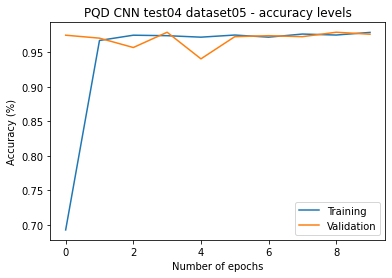

In [11]:
# Plot the training and validation accuracy of the CNN
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('PQD CNN test04 dataset05 - accuracy levels')
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

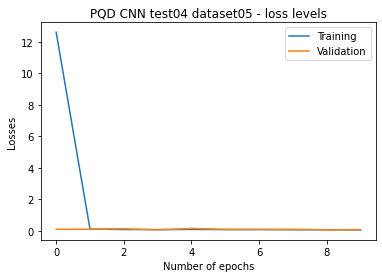

In [12]:
# Plot the training and validation loss levels of the CNN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('PQD CNN test04 dataset05 - loss levels')
plt.ylabel('Losses')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [13]:
# Evaluate the CNN with the testing dataset
results = cnn.evaluate(
    testing_dataset
)

44/44 [==============================] - 115s 2s/step - loss: 0.0997 - accuracy: 0.9714


In [14]:
# Save the trained model
cnn.save('/content/drive/My Drive/saved_models/pqd_cnn_test04_dataset05_model')
cnn.save('/content/drive/My Drive/saved_models/pqd_cnn_test04_dataset05_model.h5')

INFO:tensorflow:Assets written to: /content/drive/My Drive/saved_models/pqd_cnn_test04_dataset05_model/assets
